In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

## import the dataset

In [2]:
df=pd.read_csv('./dataset/train.csv')

In [3]:
df1_train=df.copy()

In [4]:
df1_train.head()

appno application country.alpha2        country.name decisiondate  \
0   2052/08     MS WORD             ru  Russian Federation          NaN   
1   4728/07     MS WORD             tr              Turkey          NaN   
2  44135/06     MS WORD             si            Slovenia          NaN   
3   2607/08     MS WORD             ch         Switzerland          NaN   
4  27001/06     MS WORD             ru  Russian Federation          NaN   

                                        docname doctypebranch  \
0                  CASE OF KOKOSHKINA v. RUSSIA       CHAMBER   
1                       CASE OF ÖZCAN v. TURKEY     COMMITTEE   
2            CASE OF DANIJEL PEČNIK v. SLOVENIA       CHAMBER   
3                CASE OF PALANCI v. SWITZERLAND       CHAMBER   
4  CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA       CHAMBER   

                                 ecli introductiondate issue.0 issue.1  \
0  ECLI:CE:ECHR:2009:0528JUD000205208              NaN     NaN     NaN   
1  ECLI:CE:ECHR:2018:0710JUD000472807              NaN     NaN     NaN   
2  ECLI:CE:ECHR:2012:1018JUD004413506              NaN     NaN     NaN   
3  ECLI:CE:ECHR:2014:0325JUD000260708              NaN     NaN     NaN   
4  ECLI:CE:ECHR:2009:1001JUD002700106              NaN     NaN     NaN   

  issue.10 issue.11 issue.12 issue.13 issue.14 issue.15 issue.16 issue.17  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

  issue.18 issue.19 issue.2 issue.20 issue.21 issue.22 issue.23 issue.24  \
0      NaN      NaN     NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN     NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN     NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN     NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN     NaN      NaN      NaN      NaN      NaN      NaN   

  issue.25 issue.26 issue.3 issue.4 issue.5 issue.6 issue.7 issue.8 issue.9  \
0      NaN      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1      NaN      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2      NaN      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3      NaN      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4      NaN      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

       itemid judgementdate      kpdate languageisocode  originatingbody  \
0   001-92699    28/05/2009  28/05/2009             ENG                4   
1  001-184490    10/07/2018  10/07/2018             ENG               26   
2  001-113810    18/10/2012  18/10/2012             ENG               23   
3  001-141929    25/03/2014  25/03/2014             ENG                5   
4   001-94585    01/10/2009  01/10/2009             ENG                4   

       originatingbody_name originatingbody_type                   parties.0  \
0             First Section                Court                  KOKOSHKINA   
1  Second Section Committee                Court                       ÖZCAN   
2              Fith Section                Court              DANIJEL PEČNIK   
3            Second Section                Court                     PALANCI   
4             First Section                Court  AMANAT ILYASOVA AND OTHERS   

     parties.1 parties.2         rank respondent.0 respondent.1 respondent.2  \
0       RUSSIA       NaN   685.417419          RUS          NaN          NaN   
1       TURKEY       NaN  2641.901855          TUR          NaN          NaN   
2     SLOVENIA       NaN   942.213440          SVN          NaN          NaN   
3  SWITZERLAND       NaN  1121.770142          CHE          NaN   

## summary

In [5]:
df1_train.describe()

originatingbody         rank  respondentOrderEng   sharepointid  \
count      8878.000000  8878.000000         8878.000000    8878.000000   
mean         12.255688  1357.402719           32.342532  400864.536269   
std           9.504175  1446.218266           14.062796   57670.790798   
min           4.000000   171.353943            1.000000  316255.000000   
25%           5.000000   582.323181           20.000000  347609.500000   
50%           7.000000   788.466248           38.000000  394983.500000   
75%          23.000000  1547.329742           45.000000  454025.250000   
max          29.000000  9968.310547           49.000000  501627.000000   

       typedescription    article=3    article=6   article=P1    article=5  \
count      8878.000000  8878.000000  8878.000000  8878.000000  8878.000000   
mean         14.941879     0.180221     0.550800     0.177292     0.172787   
std           0.279205     0.384393     0.497441     0.381937     0.378084   
min          12.000000     0.000000     0.000000     0.000000     0.000000   
25%          15.000000     0.000000     0.000000     0.000000     0.000000   
50%          15.000000     0.000000     1.000000     0.000000     0.000000   
75%          15.000000     0.000000     1.000000     0.000000     0.000000   
max          19.000000     1.000000     1.000000     1.000000     1.000000   

         article=8   article=13   article=10    article=2   article=34  \
count  8878.000000  8878.000000  8878.000000  8878.000000  8878.000000   
mean      0.116242     0.165578     0.058797     0.060599     0.060149   
std       0.320533     0.371722     0.235258     0.238607     0.237775   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        article=41   article=38   article=35    article=4   article=29  \
count  8878.000000  8878.000000  8878.000000  8878.000000  8878.000000   
mean      0.368101     0.005857     0.159495     0.002703     0.098108   
std       0.482316     0.076312     0.366158     0.051926     0.297477   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        article=14  article=P12    article=9    article=1   article=11  \
count  8878.000000  8878.000000  8878.000000  8878.000000  8878.000000   
mean      0.049899     0.000451     0.009687     0.005632     0.021176   
std       0.217748     0.021223     0.097950     0.074839     0.143979   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        article=46   article=P4   article=17   article=18    article=7  \
count  8878.000000  8878.000000  8878.000000  8878.000000  8878.000000   
mean      0.015093     0.007997     0.003041     0.005632     0.007434   
std       0.121932     0.089074     0.055066     0.074839     0.085905   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000

In [6]:
df1_train.shape

(8878, 328)

In [7]:
df1_train.isnull().sum()

appno                                   0
application                             0
country.alpha2                          0
country.name                            0
decisiondate                         8202
docname                                 0
doctypebranch                           0
ecli                                    0
introductiondate                     8202
issue.0                              6630
issue.1                              7693
issue.10                             8857
issue.11                             8861
issue.12                             8863
issue.13                             8866
issue.14                             8868
issue.15                             8871
issue.16                             8874
issue.17                             8875
issue.18                             8876
issue.19                             8876
issue.2                              8239
issue.20                             8876
issue.21                          

In [8]:
list1=[]
for i in df1_train.columns:
    if df1_train[i].isnull().sum()>0:
        list1.append(i)
print(list1)

['decisiondate', 'introductiondate', 'issue.0', 'issue.1', 'issue.10', 'issue.11', 'issue.12', 'issue.13', 'issue.14', 'issue.15', 'issue.16', 'issue.17', 'issue.18', 'issue.19', 'issue.2', 'issue.20', 'issue.21', 'issue.22', 'issue.23', 'issue.24', 'issue.25', 'issue.26', 'issue.3', 'issue.4', 'issue.5', 'issue.6', 'issue.7', 'issue.8', 'issue.9', 'parties.1', 'parties.2', 'respondent.1', 'respondent.2', 'respondent.3', 'respondent.4']


## creating the dataframe with missing values

In [9]:
df_train_missing=pd.DataFrame(df1_train[list1])

In [10]:
df_train_missing.head()

decisiondate introductiondate issue.0 issue.1 issue.10 issue.11 issue.12  \
0          NaN              NaN     NaN     NaN      NaN      NaN      NaN   
1          NaN              NaN     NaN     NaN      NaN      NaN      NaN   
2          NaN              NaN     NaN     NaN      NaN      NaN      NaN   
3          NaN              NaN     NaN     NaN      NaN      NaN      NaN   
4          NaN              NaN     NaN     NaN      NaN      NaN      NaN   

  issue.13 issue.14 issue.15 issue.16 issue.17 issue.18 issue.19 issue.2  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN     NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN     NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN     NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN     NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN     NaN   

  issue.20 issue.21 issue.22 issue.23 issue.24 issue.25 issue.26 issue.3  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN     NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN     NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN     NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN     NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN     NaN   

  issue.4 issue.5 issue.6 issue.7 issue.8 issue.9    parties.1 parties.2  \
0     NaN     NaN     NaN     NaN     NaN     NaN       RUSSIA       NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN       TURKEY       NaN   
2     NaN     NaN     NaN     NaN     NaN     NaN     SLOVENIA       NaN   
3     NaN     NaN     NaN     NaN     NaN     NaN  SWITZERLAND       NaN   
4     NaN     NaN     NaN     NaN     NaN     NaN       RUSSIA       NaN   

  respondent.1 respondent.2 respondent.3 respondent.4  
0          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN

## Treating the missing values

In [11]:
df_train_missing.dtypes

decisiondate        object
introductiondate    object
issue.0             object
issue.1             object
issue.10            object
issue.11            object
issue.12            object
issue.13            object
issue.14            object
issue.15            object
issue.16            object
issue.17            object
issue.18            object
issue.19            object
issue.2             object
issue.20            object
issue.21            object
issue.22            object
issue.23            object
issue.24            object
issue.25            object
issue.26            object
issue.3             object
issue.4             object
issue.5             object
issue.6             object
issue.7             object
issue.8             object
issue.9             object
parties.1           object
parties.2           object
respondent.1        object
respondent.2        object
respondent.3        object
respondent.4        object
dtype: object

## calculating the percentage of missing values

In [12]:
for i in list1:
    print(i, round((df_train_missing[i].isnull().sum()/len(df_train_missing))*100,2))

decisiondate 92.39
introductiondate 92.39
issue.0 74.68
issue.1 86.65
issue.10 99.76
issue.11 99.81
issue.12 99.83
issue.13 99.86
issue.14 99.89
issue.15 99.92
issue.16 99.95
issue.17 99.97
issue.18 99.98
issue.19 99.98
issue.2 92.8
issue.20 99.98
issue.21 99.98
issue.22 99.98
issue.23 99.98
issue.24 99.99
issue.25 99.99
issue.26 99.99
issue.3 95.83
issue.4 97.63
issue.5 98.64
issue.6 99.13
issue.7 99.4
issue.8 99.65
issue.9 99.72
parties.1 0.05
parties.2 99.99
respondent.1 99.58
respondent.2 99.99
respondent.3 99.99
respondent.4 99.99


## except for the features parties1 remaining all the columns has null values

In [13]:
## so i decided to drop all the columns with null values except parties1
list2=list1.copy()


In [14]:
list2.remove('parties.1')

In [15]:
print(list2)

['decisiondate', 'introductiondate', 'issue.0', 'issue.1', 'issue.10', 'issue.11', 'issue.12', 'issue.13', 'issue.14', 'issue.15', 'issue.16', 'issue.17', 'issue.18', 'issue.19', 'issue.2', 'issue.20', 'issue.21', 'issue.22', 'issue.23', 'issue.24', 'issue.25', 'issue.26', 'issue.3', 'issue.4', 'issue.5', 'issue.6', 'issue.7', 'issue.8', 'issue.9', 'parties.2', 'respondent.1', 'respondent.2', 'respondent.3', 'respondent.4']


In [16]:
df2_train=df1_train.drop(columns=list2)

In [17]:
df2_train.head()

appno application country.alpha2        country.name  \
0   2052/08     MS WORD             ru  Russian Federation   
1   4728/07     MS WORD             tr              Turkey   
2  44135/06     MS WORD             si            Slovenia   
3   2607/08     MS WORD             ch         Switzerland   
4  27001/06     MS WORD             ru  Russian Federation   

                                        docname doctypebranch  \
0                  CASE OF KOKOSHKINA v. RUSSIA       CHAMBER   
1                       CASE OF ÖZCAN v. TURKEY     COMMITTEE   
2            CASE OF DANIJEL PEČNIK v. SLOVENIA       CHAMBER   
3                CASE OF PALANCI v. SWITZERLAND       CHAMBER   
4  CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA       CHAMBER   

                                 ecli      itemid judgementdate      kpdate  \
0  ECLI:CE:ECHR:2009:0528JUD000205208   001-92699    28/05/2009  28/05/2009   
1  ECLI:CE:ECHR:2018:0710JUD000472807  001-184490    10/07/2018  10/07/2018   
2  ECLI:CE:ECHR:2012:1018JUD004413506  001-113810    18/10/2012  18/10/2012   
3  ECLI:CE:ECHR:2014:0325JUD000260708  001-141929    25/03/2014  25/03/2014   
4  ECLI:CE:ECHR:2009:1001JUD002700106   001-94585    01/10/2009  01/10/2009   

  languageisocode  originatingbody      originatingbody_name  \
0             ENG                4             First Section   
1             ENG               26  Second Section Committee   
2             ENG               23              Fith Section   
3             ENG                5            Second Section   
4             ENG                4             First Section   

  originatingbody_type                   parties.0    parties.1         rank  \
0                Court                  KOKOSHKINA       RUSSIA   685.417419   
1                Court                       ÖZCAN       TURKEY  2641.901855   
2                Court              DANIJEL PEČNIK     SLOVENIA   942.213440   
3                Court                     PALANCI  SWITZERLAND  1121.770142   
4                Court  AMANAT ILYASOVA AND OTHERS       RUSSIA   704.821594   

  respondent.0  respondentOrderEng  separateopinion  sharepointid  \
0          RUS                  38            False        349418   
1          TUR                  47            False        476616   
2          SVN                  43             True        373194   
3          CHE                  46             True        392525   
4          RUS                  38            False        423100   

   typedescription  article=3  article=6  article=P1  article=5  article=8  \
0               15          1          0           0          1          0   
1               15          0          0           0          1          0   
2               15          0          1           0          0          0   
3               15          0          0           0          0          1   
4               15          1          0           0          1          0   

   article=13  article=10  article=2  article=34  article=41  article=38  \
0           0           0          0           0           0           0   
1           0           0          0           0           0           0   
2           1           0          0           0           0           0   
3           0           0          0           0           0           0   
4           1           0          1           0           0           0   

   article=35  article=4  article=29  article=14  article=P12  article=9  \
0           0          0           0           0            0          0   
1           0          0           0           0            0          0   
2           0          0           0           0            0          0   
3           0          0           0           0            0          0   
4           0          0           0           0            0          0   

   article=1  article=11  article=46  article=P4  article=17  article=18  \
0          0           0   

In [18]:
df2_train.shape

(8878, 294)

In [19]:
for i in df2_train.columns:
    if df2_train[i].isnull().sum()>0:
        print(i)

parties.1


In [20]:
df2_train['parties.1'].isnull().sum()

4

## as only 4 null values are present lets drop the null values

In [21]:
df2_train.dropna(inplace=True)

In [22]:
df2_train.isnull().sum().sum()

0

## lets check for the data types

In [23]:
df2_train.dtypes

appno                                 object
application                           object
country.alpha2                        object
country.name                          object
docname                               object
doctypebranch                         object
ecli                                  object
itemid                                object
judgementdate                         object
kpdate                                object
languageisocode                       object
originatingbody                        int64
originatingbody_name                  object
originatingbody_type                  object
parties.0                             object
parties.1                             object
rank                                 float64
respondent.0                          object
respondentOrderEng                     int64
separateopinion                         bool
sharepointid                           int64
typedescription                        int64
article=3 

## seperate the object dataframe and int dataframe

In [24]:
df2_train_num=df2_train.select_dtypes(include=['int64','float64'])

In [25]:
df2_train_obj=df2_train.select_dtypes(include=['object','bool'])

In [26]:
df2_train_num.shape,df2_train_obj.shape

((8874, 277), (8874, 17))

In [27]:
df2_train.shape

(8874, 294)

## Treating the categorical features

In [28]:
df2_train_obj.head()

appno application country.alpha2        country.name  \
0   2052/08     MS WORD             ru  Russian Federation   
1   4728/07     MS WORD             tr              Turkey   
2  44135/06     MS WORD             si            Slovenia   
3   2607/08     MS WORD             ch         Switzerland   
4  27001/06     MS WORD             ru  Russian Federation   

                                        docname doctypebranch  \
0                  CASE OF KOKOSHKINA v. RUSSIA       CHAMBER   
1                       CASE OF ÖZCAN v. TURKEY     COMMITTEE   
2            CASE OF DANIJEL PEČNIK v. SLOVENIA       CHAMBER   
3                CASE OF PALANCI v. SWITZERLAND       CHAMBER   
4  CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA       CHAMBER   

                                 ecli      itemid judgementdate      kpdate  \
0  ECLI:CE:ECHR:2009:0528JUD000205208   001-92699    28/05/2009  28/05/2009   
1  ECLI:CE:ECHR:2018:0710JUD000472807  001-184490    10/07/2018  10/07/2018   
2  ECLI:CE:ECHR:2012:1018JUD004413506  001-113810    18/10/2012  18/10/2012   
3  ECLI:CE:ECHR:2014:0325JUD000260708  001-141929    25/03/2014  25/03/2014   
4  ECLI:CE:ECHR:2009:1001JUD002700106   001-94585    01/10/2009  01/10/2009   

  languageisocode      originatingbody_name originatingbody_type  \
0             ENG             First Section                Court   
1             ENG  Second Section Committee                Court   
2             ENG              Fith Section                Court   
3             ENG            Second Section                Court   
4             ENG             First Section                Court   

                    parties.0    parties.1 respondent.0  separateopinion  
0                  KOKOSHKINA       RUSSIA          RUS            False  
1                       ÖZCAN       TURKEY          TUR            False  
2              DANIJEL PEČNIK     SLOVENIA          SVN             True  
3                     PALANCI  SWITZERLAND          CHE             True  
4  AMANAT ILYASOVA AND OTHERS       RUSSIA          RUS            False

In [29]:
## drop the application number
df2_train_obj.drop('appno',inplace=True,axis=1)

In [30]:
#drop the ecli column
df2_train_obj.drop('ecli',inplace=True,axis=1)

In [31]:
#drop the itemID column
df2_train_obj.drop('itemid',inplace=True,axis=1)

In [32]:
df2_train_obj[['judgementdate','kpdate']]

judgementdate      kpdate
0       28/05/2009  28/05/2009
1       10/07/2018  10/07/2018
2       18/10/2012  18/10/2012
3       25/03/2014  25/03/2014
4       01/10/2009  01/10/2009
5       11/04/2002  11/04/2002
6       20/06/2006  20/06/2006
7       27/11/2007  27/11/2007
8       01/03/2001  01/03/2001
9       02/12/2008  02/12/2008
10      09/12/1994  09/12/1994
11      28/01/2014  28/01/2014
12      22/09/2016  22/09/2016
13      17/09/2013  17/09/2013
14      03/02/2009  03/02/2009
15      12/10/2017  12/10/2017
16      16/04/2019  16/04/2019
17      04/11/2003  04/11/2003
18      11/12/2014  11/12/2014
19      07/11/2017  07/11/2017
20      27/11/2012  27/11/2012
21      06/06/2019  06/06/2019
22      13/07/2004  13/07/2004
23      11/01/2007  11/01/2007
24      08/11/2016  08/11/2016
25      23/04/2009  23/04/2009
26      08/07/2010  08/07/2010
27      13/11/2007  13/11/2007
28      04/11/2010  04/11/2010
29      02/10/2001  02/10/2001
30      05/12/2013  05/12/2013
31      30/09/2008  30/09/2008
32      22/12/2005  22/12/2005
33      16/10/2014  16/10/2014
34      24/11/2009  24/11/2009
35      13/11/2014  13/11/2014
36      11/10/2001  11/10/2001
37      06/02/2020  06/02/2020
38      05/11/2013  05/11/2013
39      11/04/2013  11/04/2013
40      08/04/2010  08/04/2010
41      19/04/2011  19/04/2011
42      03/04/2008  03/04/2008
43      21/05/2019  21/05/2019
44      15/09/2009  15/09/2009
45      15/02/2007  15/02/2007
46      03/11/2011  03/11/2011
47      23/10/2008  23/10/2008
48      20/09/1994  20/09/1994
49      17/12/2013  17/12/2013
50      16/01/2020  16/01/2020
51      17/09/2015  17/09/2015
52      10/05/2011  10/05/2011
53      15/03/2011  15/03/2011
54      22/10/2015  22/10/2015
55      27/06/2017  27/06/2017
56      09/01/2007  09/01/2007
57      30/06/2016  30/06/2016
58      21/07/2005  21/07/2005
59      15/07/2002  15/07/2002
60      29/06/2006  29/06/2006
61      11/10/2011  11/10/2011
62      26/01/2010  26/01/2010
63      15/11/2007  15/11/2007
64      12/06/2001  12/06/2001
65      13/02/2001  13/02/2001
66      03/06/2010  03/06/2010
67      13/03/2014  13/03/2014
68      10/04/2018  10/04/2018
69      08/12/2005  08/12/2005
70      26/03/2015  26/03/2015
71      15/07/2010  15/07/2010
72      03/10/2006  03/10/2006
73      18/12/2018  18/12/2018
74      29/05/2008  29/05/2008
75      03/10/2006  03/10/2006
76      12/05/2010  12/05/2010
77      22/03/2005  22/03/2005
78      28/06/2018  28/06/2018
79      19/07/2018  19/07/2018
80      10/01/2013  10/01/2013
81      07/07/2005  07/07/2005
82      10/09/2015  10/09/2015
83      30/10/2001  30/10/2001
84      16/09/2003  16/09/2003
85      22/05/2012  22/05/2012
86      26/06/2008  26/06/2008
87      14/02/2012  14/02/2012
88      29/11/2005  29/11/2005
89      17/03/2020  17/03/2020
90      12/04/2011  12/04/2011
91      01/02/2000  01/02/2000
92      06/03/2008  06/03/2008
93      19/01/2010  19/01/2010
94      08/12/2011  08/12/2011
95      04/05/2017  04/05/2017
96      10/07/2012  10/07/2012
97      09/10/2003  09/10/2003
98      26/04/2005  26/04/2005
99      07/01/2010  07/01/2010
100     25/10/2011  25/10/2011
101     09/01/2003  09/01/2003
102     11/01/2018  11/01/2018
103     15/11/2007  15/11/2007
104     16/11/2004  16/11/2004
105     14/02/2019  14/02/2019
106     10/05/2007  10/05/2007
107     22/03/2012  22/03/2012
108     01/06/2006  01/06/2006
109     30/06/2011  30/06/2011
110     20/12/2011  20/12/2011
111     16/07/2009  16/07/2009
112     21/10/2008  21/10/2008
113     12/02/2008  12/02/2008
114     27/06/2019  27/06/2019
115     18/11/2010  18/11/2010
116     02/04/2013  02/04/2013
117     01/09/2020  01/09/2020
118     05/01/2016  05/01/2016
119     17/01/2012  17/01/2012
120     12/06/2014  12/06/2014
121     07/05/2015  07/05/2015
122     22/12/2004  22/12/2004
123     07/07/2011  07/07/2011
124     21/06/2011  21/06/2011
125     20/02/2018  20/02/2018
126     14/02/2017  14/02/2017
127     12/06/2008  12/06/2008
128   

In [33]:
## as the both the columns indiacte the same data, drop one of the column
df2_train_obj.drop('judgementdate',inplace=True,axis=1)

In [34]:
df2_train_obj['docname'].value_counts()

CASE OF NAGY v. HUNGARY                                                                                                                  5
CASE OF ORLOV AND OTHERS v. RUSSIA                                                                                                       3
CASE OF IVANOV AND OTHERS v. RUSSIA                                                                                                      3
CASE OF PONOMARENKO v. UKRAINE                                                                                                           3
CASE OF ALEKSEYEV AND OTHERS v. RUSSIA                                                                                                   3
CASE OF SAKHNOVSKIY v. RUSSIA                                                                                                            3
CASE OF VARGA v. HUNGARY                                                                                                                 3
CASE OF KAYA v. TURKEY     

In [35]:
df2_train_obj['parties.0'].value_counts()

X                                                                                                          6
M.S.                                                                                                       6
A.                                                                                                         6
SIKA                                                                                                       5
IVANOV AND OTHERS                                                                                          5
KAYA                                                                                                       5
NAGY                                                                                                       5
S.A.                                                                                                       5
A.S.                                                                                                       5
KOMANICKY          

In [36]:
df2_train_obj.drop('docname',inplace=True,axis=1)

In [37]:
df2_train_obj.drop('parties.0',inplace=True,axis=1)

In [38]:
df2_train_obj.head()

application country.alpha2        country.name doctypebranch      kpdate  \
0     MS WORD             ru  Russian Federation       CHAMBER  28/05/2009   
1     MS WORD             tr              Turkey     COMMITTEE  10/07/2018   
2     MS WORD             si            Slovenia       CHAMBER  18/10/2012   
3     MS WORD             ch         Switzerland       CHAMBER  25/03/2014   
4     MS WORD             ru  Russian Federation       CHAMBER  01/10/2009   

  languageisocode      originatingbody_name originatingbody_type    parties.1  \
0             ENG             First Section                Court       RUSSIA   
1             ENG  Second Section Committee                Court       TURKEY   
2             ENG              Fith Section                Court     SLOVENIA   
3             ENG            Second Section                Court  SWITZERLAND   
4             ENG             First Section                Court       RUSSIA   

  respondent.0  separateopinion  
0          RUS            False  
1          TUR            False  
2          SVN             True  
3          CHE             True  
4          RUS            False

In [39]:
# extracting the year from the  dataframe
df2_train_obj['year']=pd.DatetimeIndex(pd.to_datetime(df2_train_obj['kpdate'])).year

In [40]:
df2_train_obj.head()

application country.alpha2        country.name doctypebranch      kpdate  \
0     MS WORD             ru  Russian Federation       CHAMBER  28/05/2009   
1     MS WORD             tr              Turkey     COMMITTEE  10/07/2018   
2     MS WORD             si            Slovenia       CHAMBER  18/10/2012   
3     MS WORD             ch         Switzerland       CHAMBER  25/03/2014   
4     MS WORD             ru  Russian Federation       CHAMBER  01/10/2009   

  languageisocode      originatingbody_name originatingbody_type    parties.1  \
0             ENG             First Section                Court       RUSSIA   
1             ENG  Second Section Committee                Court       TURKEY   
2             ENG              Fith Section                Court     SLOVENIA   
3             ENG            Second Section                Court  SWITZERLAND   
4             ENG             First Section                Court       RUSSIA   

  respondent.0  separateopinion  year  
0          RUS            False  2009  
1          TUR            False  2018  
2          SVN             True  2012  
3          CHE             True  2014  
4          RUS            False  2009

In [41]:
# extracting the month from the  dataframe
df2_train_obj['month']=pd.DatetimeIndex(pd.to_datetime(df2_train_obj['kpdate'])).month

In [42]:
# extracting the day from the  dataframe
df2_train_obj['day']=pd.DatetimeIndex(pd.to_datetime(df2_train_obj['kpdate'])).day

In [43]:
df2_train_obj.head()

application country.alpha2        country.name doctypebranch      kpdate  \
0     MS WORD             ru  Russian Federation       CHAMBER  28/05/2009   
1     MS WORD             tr              Turkey     COMMITTEE  10/07/2018   
2     MS WORD             si            Slovenia       CHAMBER  18/10/2012   
3     MS WORD             ch         Switzerland       CHAMBER  25/03/2014   
4     MS WORD             ru  Russian Federation       CHAMBER  01/10/2009   

  languageisocode      originatingbody_name originatingbody_type    parties.1  \
0             ENG             First Section                Court       RUSSIA   
1             ENG  Second Section Committee                Court       TURKEY   
2             ENG              Fith Section                Court     SLOVENIA   
3             ENG            Second Section                Court  SWITZERLAND   
4             ENG             First Section                Court       RUSSIA   

  respondent.0  separateopinion  year  month  day  
0          RUS            False  2009      5   28  
1          TUR            False  2018     10    7  
2          SVN             True  2012     10   18  
3          CHE             True  2014      3   25  
4          RUS            False  2009      1   10

In [44]:
# drop the kpdate column
df2_train_obj.drop('kpdate',axis=1,inplace=True)

In [45]:
df2_train_obj['country.name'].value_counts()

Russian Federation        1647
Ukraine                    933
Turkey                     867
Poland                     617
Hungary                    364
Romania                    335
Bulgaria                   303
United Kingdom             301
Croatia                    255
Austria                    233
Slovakia                   227
Italy                      223
Moldova, Republic of       219
Slovenia                   209
Germany                    196
France                     172
Azerbaijan                 134
Lithuania                  130
Serbia                     127
Finland                    116
North Macedonia            110
Greece                      97
Netherlands                 96
Armenia                     85
Switzerland                 73
Malta                       70
Sweden                      67
Latvia                      66
Georgia                     61
Cyprus                      55
Czechia                     51
Portugal                    51
Bosnia a

In [46]:
df2_train_num[['year','month','day']]=df2_train_obj[['year','month','day']]

In [47]:
df2_train_obj.drop(['year','month','day'],axis=1,inplace=True)

In [48]:
df2_train_obj.head()

application country.alpha2        country.name doctypebranch  \
0     MS WORD             ru  Russian Federation       CHAMBER   
1     MS WORD             tr              Turkey     COMMITTEE   
2     MS WORD             si            Slovenia       CHAMBER   
3     MS WORD             ch         Switzerland       CHAMBER   
4     MS WORD             ru  Russian Federation       CHAMBER   

  languageisocode      originatingbody_name originatingbody_type    parties.1  \
0             ENG             First Section                Court       RUSSIA   
1             ENG  Second Section Committee                Court       TURKEY   
2             ENG              Fith Section                Court     SLOVENIA   
3             ENG            Second Section                Court  SWITZERLAND   
4             ENG             First Section                Court       RUSSIA   

  respondent.0  separateopinion  
0          RUS            False  
1          TUR            False  
2          SVN             True  
3          CHE             True  
4          RUS            False

In [49]:
df3_train_obj=pd.get_dummies(df2_train_obj)

In [50]:
df3_train_obj.head()

separateopinion  application_MS WORD  country.alpha2_ad  country.alpha2_al  \
0            False                    1                  0                  0   
1            False                    1                  0                  0   
2             True                    1                  0                  0   
3             True                    1                  0                  0   
4            False                    1                  0                  0   

   country.alpha2_am  country.alpha2_at  country.alpha2_az  country.alpha2_ba  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   country.alpha2_be  country.alpha2_bg  country.alpha2_ch  country.alpha2_cy  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  1                  0   
4                  0                  0                  0                  0   

   country.alpha2_cz  country.alpha2_de  country.alpha2_dk  country.alpha2_ee  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   country.alpha2_es  country.alpha2_fi  country.alpha2_fr  country.alpha2_gb  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   country.alpha2_ge  country.alpha2_gr  country.alpha2_hr  country.alpha2_hu  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   country.alpha2_ie  country.alpha2_is  country.alpha2_it  country.alpha2_li  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   country.alpha2_lt  country.alpha2_lu  country.alpha2_lv  country.alpha2_md  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   country.alpha2_me  country.alpha2_mk  country.alpha2_mt  country.alpha2_nl  \
0                  0      

In [51]:
df3_train_obj.shape,df2_train_obj.shape

((8874, 251), (8874, 10))

## Treating the numerical feateures

In [52]:
df2_train_num.head()

originatingbody         rank  respondentOrderEng  sharepointid  \
0                4   685.417419                  38        349418   
1               26  2641.901855                  47        476616   
2               23   942.213440                  43        373194   
3                5  1121.770142                  46        392525   
4                4   704.821594                  38        423100   

   typedescription  article=3  article=6  article=P1  article=5  article=8  \
0               15          1          0           0          1          0   
1               15          0          0           0          1          0   
2               15          0          1           0          0          0   
3               15          0          0           0          0          1   
4               15          1          0           0          1          0   

   article=13  article=10  article=2  article=34  article=41  article=38  \
0           0           0          0           0           0           0   
1           0           0          0           0           0           0   
2           1           0          0           0           0           0   
3           0           0          0           0           0           0   
4           1           0          1           0           0           0   

   article=35  article=4  article=29  article=14  article=P12  article=9  \
0           0          0           0           0            0          0   
1           0          0           0           0            0          0   
2           0          0           0           0            0          0   
3           0          0           0           0            0          0   
4           0          0           0           0            0          0   

   article=1  article=11  article=46  article=P4  article=17  article=18  \
0          0           0           0           0           0           0   
1          0           0           0           0           0           0   
2          0           0           0           0           0           0   
3          0           0           0           0           0           0   
4          0           0           0           0           0           0   

   article=7  article=  article=37  article=P7  article=57  article=26  \
0          0         0           0           0           0           0   
1          0         0           0           0           0           0   
2          0         0           0           0           0           0   
3          0         0           0           0           0           0   
4          0         0           0           0           0           0   

   article=27  article=36  article=30  article=12  article=56  article=39  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   article=15  article=25  article=P6  article=19  article=32  article=33  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   article=53  article=28  article=43  article=52  article=P13  article=16  \
0           0           0           0           0            0           0   
1           0           0           0           0            0           0   
2           0           0           0           0            0           0   
3           0           0           0           0            0   

In [53]:
df2_train_num['sharepointid']

0       349418
1       476616
2       373194
3       392525
4       423100
5       321267
6       328050
7       416925
8       324412
9       350214
10      445190
11      376664
12      455140
13      384687
14      348787
15      468746
16      487510
17      318591
18      455240
19      469507
20      373922
21      488713
22      318758
23      340757
24      458079
25      353008
26      451571
27      340284
28      362029
29      324192
30      380168
31      350987
32      333106
33      456108
34      354926
35      393757
36      324222
37      495987
38      385422
39      369393
40      347689
41      363799
42      345147
43      488263
44      353793
45      341076
46      365344
47      348302
48      415499
49      439069
50      495272
51      422709
52      453475
53      363444
54      425204
55      465528
56      341999
57      463709
58      328888
59      320250
60      328179
61      452322
62      347295
63      344152
64      317554
65      324357
66      36

In [54]:
## drop the sahrepointid column
df2_train_num.drop('sharepointid',axis=1,inplace=True)

## checking for imbalancing of target variable

In [55]:
df2_train['importance'].value_counts()

4    5772
3    2011
1     582
2     509
Name: importance, dtype: int64

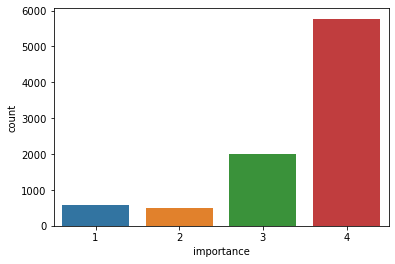

In [56]:
sns.countplot(df2_train['importance'])
plt.show()

In [57]:
#df2_train['importance'].dtype
#(df2_train[df2_train['importance']==4])

## clear imbalancing is present in the target variable

## concatenate the numerical and categoricl dataferame

In [58]:
df_train=pd.concat([df2_train_num,df3_train_obj],axis=1)

In [59]:
#df_train.drop('importance',axis=1,inplace=True)

In [60]:
df_train.shape

(8874, 530)

In [61]:
df3_train_obj.shape,df2_train_num.shape

((8874, 251), (8874, 279))

In [62]:
df_train.head()

originatingbody         rank  respondentOrderEng  typedescription  \
0                4   685.417419                  38               15   
1               26  2641.901855                  47               15   
2               23   942.213440                  43               15   
3                5  1121.770142                  46               15   
4                4   704.821594                  38               15   

   article=3  article=6  article=P1  article=5  article=8  article=13  \
0          1          0           0          1          0           0   
1          0          0           0          1          0           0   
2          0          1           0          0          0           1   
3          0          0           0          0          1           0   
4          1          0           0          1          0           1   

   article=10  article=2  article=34  article=41  article=38  article=35  \
0           0          0           0           0           0           0   
1           0          0           0           0           0           0   
2           0          0           0           0           0           0   
3           0          0           0           0           0           0   
4           0          1           0           0           0           0   

   article=4  article=29  article=14  article=P12  article=9  article=1  \
0          0           0           0            0          0          0   
1          0           0           0            0          0          0   
2          0           0           0            0          0          0   
3          0           0           0            0          0          0   
4          0           0           0            0          0          0   

   article=11  article=46  article=P4  article=17  article=18  article=7  \
0           0           0           0           0           0          0   
1           0           0           0           0           0          0   
2           0           0           0           0           0          0   
3           0           0           0           0           0          0   
4           0           0           0           0           0          0   

   article=  article=37  article=P7  article=57  article=26  article=27  \
0         0           0           0           0           0           0   
1         0           0           0           0           0           0   
2         0           0           0           0           0           0   
3         0           0           0           0           0           0   
4         0           0           0           0           0           0   

   article=36  article=30  article=12  article=56  article=39  article=15  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   article=25  article=P6  article=19  article=32  article=33  article=53  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   article=28  article=43  article=52  article=P13  article=16  \
0           0           0           0            0           0   
1           0           0           0            0           0   
2           0           0           0            0           0   
3           0           0           0            0           0   
4           0           0           0            0         

In [68]:
list(df_train.columns)

['originatingbody',
 'rank',
 'respondentOrderEng',
 'typedescription',
 'article=3',
 'article=6',
 'article=P1',
 'article=5',
 'article=8',
 'article=13',
 'article=10',
 'article=2',
 'article=34',
 'article=41',
 'article=38',
 'article=35',
 'article=4',
 'article=29',
 'article=14',
 'article=P12',
 'article=9',
 'article=1',
 'article=11',
 'article=46',
 'article=P4',
 'article=17',
 'article=18',
 'article=7',
 'article=',
 'article=37',
 'article=P7',
 'article=57',
 'article=26',
 'article=27',
 'article=36',
 'article=30',
 'article=12',
 'article=56',
 'article=39',
 'article=15',
 'article=25',
 'article=P6',
 'article=19',
 'article=32',
 'article=33',
 'article=53',
 'article=28',
 'article=43',
 'article=52',
 'article=P13',
 'article=16',
 'documentcollectionid=CASELAW',
 'documentcollectionid=JUDGMENTS',
 'documentcollectionid=CHAMBER',
 'documentcollectionid=ENG',
 'documentcollectionid=COMMITTEE',
 'documentcollectionid=GRANDCHAMBER',
 'applicability=',
 'applicab

## Seperating the target and independent variables

## KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn=KNeighborsClassifier()

In [72]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [73]:
y_pred=knn.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred)

0.6582801351858806

## RAndomforest

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rand_for=RandomForestClassifier()

In [77]:
rand_for.fit(X_train,y_train)

RandomForestClassifier()

In [78]:
y_pred=rand_for.predict(X_test)

In [92]:
accuracy_score(y_test,y_pred)

0.8802102891475779

## Gausian naive bayes

In [93]:
from sklearn.naive_bayes import GaussianNB

In [94]:
gnb=GaussianNB()

In [95]:
gnb.fit(X_train,y_train)

GaussianNB()

In [96]:
y_pred=gnb.predict(X_test)

In [97]:
accuracy_score(y_test,y_pred)

0.7333834021779947

## from the above base models random forest performed well

## predicting on the test dataset

In [69]:
df_test=pd.read_csv('./dataset/clean_test1.csv')

In [70]:
df_test.head()

originatingbody         rank  respondentOrderEng  typedescription  \
0               29   794.766724                  33               15   
1               23  1448.891235                  48               15   
2               29   868.238831                  22               15   
3                4  1024.145508                  38               15   
4                4   672.862183                  38               15   

   article=3  article=6  article=P1  article=5  article=8  article=13  \
0          0          1           0          0          0           0   
1          1          0           0          1          0           0   
2          0          1           0          0          0           0   
3          0          0           1          0          0           0   
4          0          0           0          1          0           0   

   article=10  article=2  article=34  article=41  article=38  article=35  \
0           0          0           0           0           0           0   
1           0          0           0           0           0           0   
2           0          0           0           0           0           0   
3           0          0           0           1           0           1   
4           0          0           0           1           0           0   

   article=4  article=29  article=14  article=P12  article=9  article=1  \
0          0           0           0            0          0          0   
1          0           0           0            0          0          0   
2          0           0           0            0          0          0   
3          0           0           0            0          0          0   
4          0           0           0            0          0          0   

   article=11  article=46  article=P4  article=17  article=18  article=7  \
0           0           0           0           0           0          0   
1           0           0           0           0           0          0   
2           0           0           0           0           0          0   
3           0           0           0           0           0          0   
4           0           0           0           0           0          0   

   article=  article=37  article=P7  article=57  article=26  article=27  \
0         0           0           0           0           0           0   
1         0           0           0           0           0           0   
2         0           0           0           0           0           0   
3         0           0           0           0           0           0   
4         0           0           0           0           0           0   

   article=36  article=30  article=12  article=56  article=39  article=15  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   article=25  article=P6  article=19  article=32  article=33  article=53  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   article=28  article=43  article=52  article=P13  article=16  \
0           0           0           0            0           0   
1           0           0           0            0           0   
2           0           0           0            0           0   
3           0           0           0            0           0   
4           0           0           0            0         

In [75]:
set1=set(df_train.columns)
set2=set(df_test.columns)
set3=set1.intersection(set2)

In [81]:
list3=list(set3)

In [82]:
list3

['paragraphs=P7-2',
 'originatingbody',
 'country.name_San Marino',
 'paragraphs=56',
 'paragraphs=5-4',
 'applicability=34',
 'respondent.0_HRV',
 'paragraphs=5-1-a',
 'paragraphs=5-1-b',
 'parties.1_LUXEMBOURG',
 'country.alpha2_ua',
 'paragraphs=18',
 'country.alpha2_az',
 'country.name_Bulgaria',
 'applicability=62',
 'paragraphs=P1-1-2',
 'country.name_Germany',
 'paragraphs=2',
 'paragraphs=2-1',
 'applicability=54',
 'country.name_Romania',
 'article=11',
 'applicability=23',
 'country.alpha2_de',
 'country.alpha2_it',
 'respondent.0_BGR',
 'country.alpha2_gr',
 'applicability=47',
 'ccl_article=46',
 'paragraphs=36-1',
 'paragraphs=4',
 'respondent.0_CYP',
 'paragraphs=25-1',
 'article=13',
 'article=30',
 'applicability=29',
 'parties.1_THE UNITED KINGDOM',
 'paragraphs=P1-1',
 'article=28',
 'parties.1_CYPRUS',
 'paragraphs=9-1',
 'originatingbody_name_Grand Chamber',
 'paragraphs=46-4',
 'year',
 'applicability=36',
 'paragraphs=25',
 'parties.1_LITHUANIA',
 'originatingbody

In [111]:
s1=pd.Series(np.zeros(shape=8874))
df1_train1=pd.DataFrame(s1)
for i in list3:
    df1_train1[i]=df_train[i]

In [112]:
df1_train1.head()

0  paragraphs=P7-2  originatingbody  country.name_San Marino  \
0  0.0              0.0              4.0                      0.0   
1  0.0              0.0             26.0                      0.0   
2  0.0              0.0             23.0                      0.0   
3  0.0              0.0              5.0                      0.0   
4  0.0              0.0              4.0                      0.0   

   paragraphs=56  paragraphs=5-4  applicability=34  respondent.0_HRV  \
0            0.0             0.0               0.0               0.0   
1            0.0             1.0               0.0               0.0   
2            0.0             0.0               0.0               0.0   
3            0.0             0.0               0.0               0.0   
4            0.0             0.0               0.0               0.0   

   paragraphs=5-1-a  paragraphs=5-1-b  parties.1_LUXEMBOURG  \
0               0.0               0.0                   0.0   
1               0.0               0.0                   0.0   
2               0.0               0.0                   0.0   
3               0.0               0.0                   0.0   
4               0.0               0.0                   0.0   

   country.alpha2_ua  paragraphs=18  country.alpha2_az  country.name_Bulgaria  \
0                0.0            0.0                0.0                    0.0   
1                0.0            0.0                0.0                    0.0   
2                0.0            0.0                0.0                    0.0   
3                0.0            0.0                0.0                    0.0   
4                0.0            0.0                0.0                    0.0   

   applicability=62  paragraphs=P1-1-2  country.name_Germany  paragraphs=2  \
0               0.0                0.0                   0.0           0.0   
1               0.0                0.0                   0.0           0.0   
2               0.0                0.0                   0.0           0.0   
3               0.0                0.0                   0.0           0.0   
4               0.0                0.0                   0.0           1.0   

   paragraphs=2-1  applicability=54  country.name_Romania  article=11  \
0             0.0               0.0                   0.0         0.0   
1             0.0               0.0                   0.0         0.0   
2             0.0               0.0                   0.0         0.0   
3             0.0               0.0                   0.0         0.0   
4             0.0               0.0                   0.0         0.0   

   applicability=23  country.alpha2_de  country.alpha2_it  respondent.0_BGR  \
0               0.0                0.0                0.0               0.0   
1               0.0                0.0                0.0               0.0   
2               0.0                0.0                0.0               0.0   
3               0.0                0.0                0.0               0.0   
4               0.0                0.0                0.0               0.0   

   country.alpha2_gr  applicability=47  ccl_article=46  paragraphs=36-1  \
0                0.0               0.0             0.0              0.0   
1                0.0               0.0             0.0              0.0   
2                0.0               0.0             0.0              0.0   
3                0.0               0.0             0.0              0.0   
4                0.0               0.0             0.0              0.0   

   paragraphs=4  respondent.0_CYP  paragraphs=25-1  article=13  article=30  \
0           0.0               0.0              0.0         0.0         0.0   
1           0.0               0.0              0.0         0.0         0.0   
2           0.0               0.0              0.0         1.0         0.0   
3           0.0               0.0              0.0         0.0         0.0   
4           0.0               0.0              0.0         1.0     

In [113]:
df1_train1.shape

(8874, 499)

In [114]:
df_test.shape

(4758, 512)

In [115]:
s2=pd.Series(np.zeros(shape=4758))
df1_test1=pd.DataFrame(s2)
for i in list3:
    df1_test1[i]=df_test[i]

In [116]:
df1_test1.head()

0  paragraphs=P7-2  originatingbody  country.name_San Marino  \
0  0.0                0               29                        0   
1  0.0                0               23                        0   
2  0.0                0               29                        0   
3  0.0                0                4                        0   
4  0.0                0                4                        0   

   paragraphs=56  paragraphs=5-4  applicability=34  respondent.0_HRV  \
0              0               0                 0                 0   
1              0               1                 0                 0   
2              0               0                 0                 0   
3              0               0                 0                 0   
4              0               1                 0                 0   

   paragraphs=5-1-a  paragraphs=5-1-b  parties.1_LUXEMBOURG  \
0                 0                 0                     0   
1                 0                 0                     0   
2                 0                 0                     0   
3                 0                 0                     0   
4                 0                 0                     0   

   country.alpha2_ua  paragraphs=18  country.alpha2_az  country.name_Bulgaria  \
0                  0              0                  0                      0   
1                  1              0                  0                      0   
2                  0              0                  0                      0   
3                  0              0                  0                      0   
4                  0              0                  0                      0   

   applicability=62  paragraphs=P1-1-2  country.name_Germany  paragraphs=2  \
0                 0                  0                     0             0   
1                 0                  0                     0             0   
2                 0                  0                     0             0   
3                 0                  0                     0             0   
4                 0                  0                     0             0   

   paragraphs=2-1  applicability=54  country.name_Romania  article=11  \
0               0                 0                     0           0   
1               0                 0                     0           0   
2               0                 0                     0           0   
3               0                 0                     0           0   
4               0                 0                     0           0   

   applicability=23  country.alpha2_de  country.alpha2_it  respondent.0_BGR  \
0                 0                  0                  0                 0   
1                 0                  0                  0                 0   
2                 0                  0                  0                 0   
3                 0                  0                  0                 0   
4                 0                  0                  0                 0   

   country.alpha2_gr  applicability=47  ccl_article=46  paragraphs=36-1  \
0                  0                 0               0                0   
1                  0                 0               0                0   
2                  0                 0               0                0   
3                  0                 0               0                0   
4                  0                 0               0                0   

   paragraphs=4  respondent.0_CYP  paragraphs=25-1  article=13  article=30  \
0             0                 0                0           0           0   
1             0                 0                0           0           0   
2             0                 0                0           0           0   
3             0                 0                0           0           0   
4             0                 0                0           0     

In [117]:
df1_test1.shape

(4758, 499)

In [119]:
df1_train1.drop(0,axis=1,inplace=True)

In [120]:
df1_test1.drop(0,axis=1,inplace=True)

In [121]:
df1_train1.shape,df1_test1.shape

((8874, 498), (4758, 498))

## seperating the dependent variables and independent variables

In [122]:
X=df1_train1
y=df_train['importance']

In [123]:
X.shape,y.shape

((8874, 498), (8874,))

In [146]:
X.dropna(inplace=True)
y.dropna(inplace=True)

In [150]:
y=y[0:8870]

In [151]:
X.shape,y.shape

((8870, 498), (8870,))

## train test split

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## building random forest classifier

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
ran_for_cla=RandomForestClassifier()

In [156]:
ran_for_cla.fit(X_train,y_train)

RandomForestClassifier()

In [158]:
y_pred=ran_for_cla.predict(X_test)

In [159]:
from sklearn.metrics import accuracy_score

In [160]:
accuracy_score(y_test,y_pred)

0.8850056369785795

In [162]:
df1_test1.isnull().sum().sum()

0

## creating the cleaned test data set

In [164]:
df1_test1.to_csv('./dataset/clean_test2.csv',index=False)

## predicting the test data set

In [165]:
test_pred=ran_for_cla.predict(df1_test1)

In [167]:
test_pred

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [168]:
len(test_pred)

4758

In [170]:
df_test_raw=pd.read_csv('./dataset/test.csv')

In [179]:
submission1=pd.DataFrame(pd.Series(test_pred),columns=['Importnace'])

In [180]:
submission1.head()

Importnace
0           4
1           4
2           4
3           3
4           3

In [181]:
submission1.shape

(4758, 1)

In [182]:
submission1['appno']=df_test_raw['appno']

In [183]:
submission1.shape

(4758, 2)

In [184]:
submission1.isnull().sum()

Importnace    0
appno         0
dtype: int64

In [187]:
submission1.to_csv('./dataset/submission2.csv',index=False)

In [191]:
submission1.rename(columns={'appno':'Imporatance','Importnace':'appno'},inplace=True)

In [192]:
submission3=submission1.copy()

In [193]:
submission3.head()

appno Imporatance
0      4     1194/04
1      4    53865/11
2      4    43838/07
3      3    11157/04
4      3    42443/02

In [194]:
submission3['appno']=submission1['Imporatance']
submission3['Imporatance']=submission1['appno']

In [195]:
submission3.head()

appno  Imporatance
0   1194/04            4
1  53865/11            4
2  43838/07            4
3  11157/04            3
4  42443/02            3

In [198]:
submission3.to_csv('C:/Users/KSK/Downloads/citizen_grievences_hacker_earth/datasetsubmission3.csv',index=False)